In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# BASE DE DADOS RISCO DE CRÉDITO

In [3]:
base_credito = pd.read_csv('credit_data.csv')

In [4]:
base_credito #income=renda, age=idade, loan=emprestimo, default 0 = não é inadimplente, 1 é inadimplente

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [5]:
base_credito = base_credito.rename(columns= {'income':'renda', 'age':'idade','loan':'emprestimo'})

In [6]:
base_credito.describe()

,clientid,renda,idade,emprestimo,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


## Visualização dos dados   

In [7]:
np.unique(base_credito['default'], return_counts=True)

(array([0, 1], dtype=int64), array([1717,  283], dtype=int64))

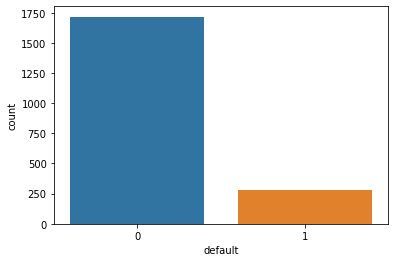

In [9]:
sns.countplot(x = base_credito['default']);

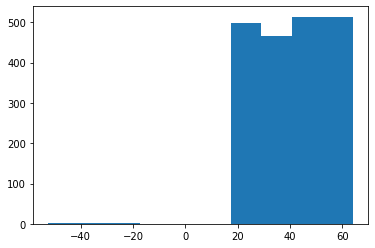

In [10]:
plt.hist(x = base_credito['idade']);

In [11]:
base_credito[base_credito['idade']<= 0]

,clientid,renda,idade,emprestimo,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [12]:
grafico = px.scatter_matrix(base_credito, dimensions=['renda','idade','emprestimo'], color='default')
grafico.show()

In [13]:
base_credito.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clientid    2000 non-null   int64  
 1   renda       2000 non-null   float64
 2   idade       1997 non-null   float64
 3   emprestimo  2000 non-null   float64
 4   default     2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


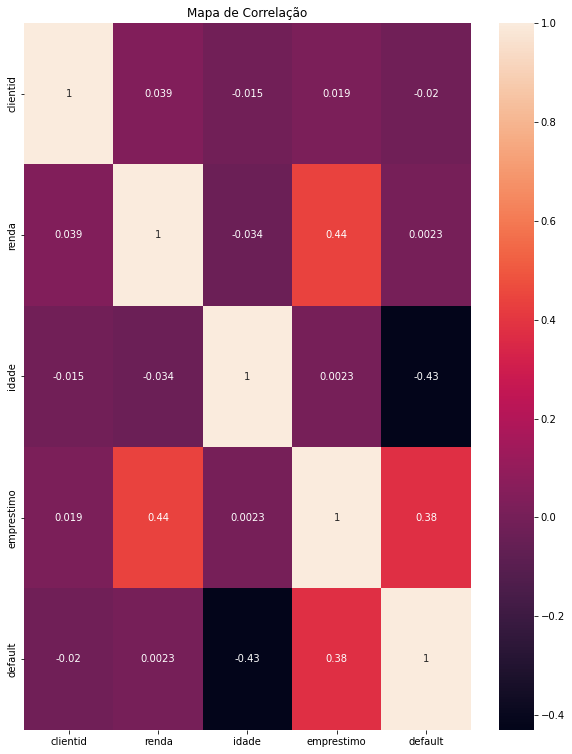

In [14]:
plt.figure(figsize=(10,13))
sns.heatmap(base_credito.corr(), annot = True)
plt.title('Mapa de Correlação')
plt.show()

## Tratar dados inconsistentes    

In [15]:
#podemos excluir a coluna idade
base_credito2 = base_credito.drop('idade', axis=1)
base_credito2

,clientid,renda,emprestimo,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [16]:
#excluir os dados inconsistentes.
base_credito.index

RangeIndex(start=0, stop=2000, step=1)

In [17]:
#base_credito[base_credito['idade']<=0].index
base_credito3 = base_credito.drop(base_credito[base_credito['idade']<=0].index)

In [18]:
base_credito3

,clientid,renda,idade,emprestimo,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [19]:
#preencher manualmente com a média
base_credito.mean()

clientid       1000.500000
renda         45331.600018
idade            40.807559
emprestimo     4444.369695
default           0.141500
dtype: float64

In [20]:
base_credito['idade'][base_credito['idade']>0].mean()

40.92770044906149

In [21]:
base_credito.loc[base_credito['idade']<=0, 'idade'] = base_credito['idade'][base_credito['idade']>0].mean()

In [22]:
base_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clientid    2000 non-null   int64  
 1   renda       2000 non-null   float64
 2   idade       1997 non-null   float64
 3   emprestimo  2000 non-null   float64
 4   default     2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [23]:
base_credito.isnull().sum()

clientid      0
renda         0
idade         3
emprestimo    0
default       0
dtype: int64

In [24]:
base_credito.loc[pd.isnull(base_credito['idade'])]

,clientid,renda,idade,emprestimo,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [25]:
base_credito['idade'].fillna(base_credito['idade'].mean(), inplace=True)

In [26]:
base_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clientid    2000 non-null   int64  
 1   renda       2000 non-null   float64
 2   idade       2000 non-null   float64
 3   emprestimo  2000 non-null   float64
 4   default     2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


## Teste f, quais variáveis possuem mais correlação com a resposta

In [27]:
from sklearn.feature_selection import f_classif

In [28]:
coluna = ['renda','idade','emprestimo']

In [29]:
X = base_credito.iloc[:,1:4]
y = base_credito.iloc[:,4]

In [30]:
[f_stat,f_p_value] = f_classif(X,y)

In [31]:
f_test_df = pd.DataFrame({'Coluna': coluna,
                          'F statistic': f_stat,
                          'p value': f_p_value})
f_test_df.sort_values('p value')

,Coluna,F statistic,p value
1,idade,493.729763,6.203961e-98
2,emprestimo,331.348186,1.263209e-68
0,renda,0.010426,9.186822e-01


## Divisão entre previsores e classe

In [32]:
type(base_credito)
base_credito.head()

,clientid,renda,idade,emprestimo,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [33]:
X_credito = base_credito.iloc[:,1:4].values

In [34]:
X_credito

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [39]:
type(X_credito)

numpy.ndarray

In [40]:
y_credito = base_credito.iloc[:,4].values

In [41]:
type(y_credito)

numpy.ndarray

## Escalonamento  

In [42]:
X_credito

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [43]:
X_credito[:,0].min(), X_credito[:,1].min(), X_credito[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [44]:
X_credito[:,0].max(), X_credito[:,1].max(), X_credito[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler_credito = StandardScaler()
X_credito = scaler_credito.fit_transform(X_credito)

In [46]:
X_credito[:,0].min(), X_credito[:,1].min(), X_credito[:,2].min()

(-1.7676158019964077, -1.7264154144794286, -1.4592791099462408)

In [47]:
X_credito[:,0].max(), X_credito[:,1].max(), X_credito[:,2].max()

(1.7220222385319197, 1.739366520151568, 3.0616609141708273)

## Algoritmos de classificação    

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_credito_treinamento, X_credito_teste, y_credito_treinamento, y_credito_teste = train_test_split(X_credito, y_credito, test_size=0.25,random_state=0)

In [50]:
X_credito_treinamento.shape

(1500, 3)

In [51]:
X_credito_teste.shape

(500, 3)

## Regressão logistica

### Melhores parametros

In [52]:
X_credito

array([[ 1.45393393,  1.36538005,  1.20281942],
       [-0.76217555,  0.54265932,  0.69642695],
       [ 0.83682073,  1.67417101,  1.17471147],
       ...,
       [-0.07122592, -0.97448606,  0.35420081],
       [-0.11000289,  1.73936652, -0.92675625],
       [ 1.682986  ,  1.14917551,  0.96381038]])

In [54]:
y_credito

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [56]:
parametros = {'C': [0.1, 1.0, 2.0],
              'solver': ['lbfgs', 'liblinear', 'saga']}

In [57]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credito,y_credito)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'liblinear'}
0.9490000000000001


### Modelo e Metricas

In [60]:
from sklearn.linear_model import LogisticRegression
risc_log = LogisticRegression(C = 1, solver='liblinear')

In [61]:
risc_log.fit(X_credito_treinamento,y_credito_treinamento)

LogisticRegression(C=1, solver='liblinear')

In [62]:
prev = risc_log.predict(X_credito_teste)

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [64]:
accuracy_score(y_credito_teste,prev)

0.944

In [65]:
confusion_matrix(y_credito_teste,prev)

array([[422,  14],
       [ 14,  50]], dtype=int64)

In [66]:
prev[0:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [67]:
prev_prob = risc_log.predict_proba(X_credito_teste)
prev_prob[0:10]

array([[1.02547595e-02, 9.89745241e-01],
       [9.99630461e-01, 3.69538799e-04],
       [9.99964388e-01, 3.56117466e-05],
       [9.22759548e-01, 7.72404518e-02],
       [9.96530693e-01, 3.46930680e-03],
       [9.94611156e-01, 5.38884406e-03],
       [9.60611365e-01, 3.93886354e-02],
       [9.83086368e-01, 1.69136320e-02],
       [3.12508907e-01, 6.87491093e-01],
       [9.99684819e-01, 3.15181169e-04]])

In [68]:
pos_prob = prev_prob[:,1]

In [69]:
pos_prob[0:10]

array([9.89745241e-01, 3.69538799e-04, 3.56117466e-05, 7.72404518e-02,
       3.46930680e-03, 5.38884406e-03, 3.93886354e-02, 1.69136320e-02,
       6.87491093e-01, 3.15181169e-04])

(array([383.,  21.,  15.,   6.,  10.,  15.,   9.,   9.,   7.,  25.]),
 array([1.10135274e-08, 9.98246925e-02, 1.99649374e-01, 2.99474055e-01,
        3.99298737e-01, 4.99123418e-01, 5.98948100e-01, 6.98772781e-01,
        7.98597463e-01, 8.98422144e-01, 9.98246826e-01]),
 <BarContainer object of 10 artists>)

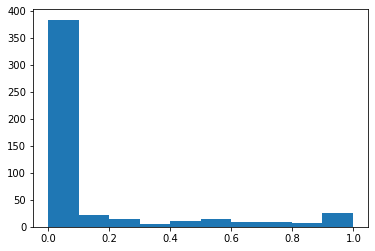

In [70]:
plt.hist(pos_prob)

In [71]:
pos_sample_pos_prob = pos_prob[y_credito_teste==1]
neg_sample_pos_prob = pos_prob[y_credito_teste==0]

In [72]:
pos_sample_pos_prob

array([0.98974524, 0.55108417, 0.50464747, 0.99606954, 0.92675908,
       0.7759204 , 0.62339933, 0.97560566, 0.75432025, 0.99808725,
       0.95170838, 0.88619292, 0.91139143, 0.67521331, 0.92151443,
       0.9952448 , 0.76303892, 0.99691855, 0.63179106, 0.97679449,
       0.75738946, 0.74815464, 0.81317995, 0.97946935, 0.92568261,
       0.78862631, 0.47812553, 0.73277689, 0.27164597, 0.95579606,
       0.28543656, 0.99824683, 0.79658736, 0.40461696, 0.92581922,
       0.49527238, 0.40855791, 0.85335022, 0.99119257, 0.91428088,
       0.80638766, 0.1947697 , 0.91535812, 0.71448957, 0.96512974,
       0.95804013, 0.52763285, 0.92930148, 0.47089611, 0.93482469,
       0.90859657, 0.68504087, 0.23444454, 0.44160667, 0.90829061,
       0.22394833, 0.85762751, 0.24129468, 0.55478362, 0.20691527,
       0.86434009, 0.51974879, 0.27131327, 0.56244595])

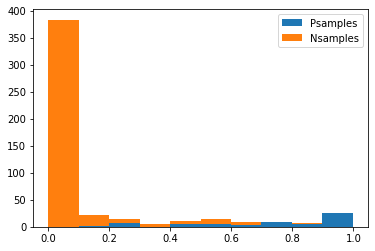

In [73]:
plt.hist([pos_sample_pos_prob,neg_sample_pos_prob],histtype='barstacked')
plt.legend(['Psamples','Nsamples'])

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score

In [75]:
fpr, tpr, thresholds = roc_curve(y_credito_teste,pos_prob)

Text(0, 0.5, 'TPR')

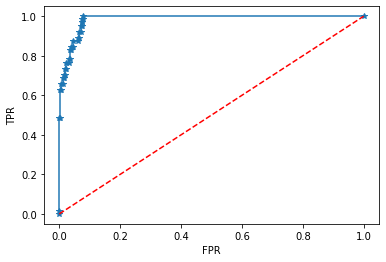

In [76]:
plt.plot(fpr,tpr,'*-')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [77]:
thresholds

array([1.99824683e+00, 9.98246826e-01, 8.06387657e-01, 8.04644977e-01,
       7.14489574e-01, 6.86743033e-01, 6.75213311e-01, 6.38329090e-01,
       6.23399328e-01, 5.85594561e-01, 5.62445947e-01, 5.56780524e-01,
       5.51084174e-01, 5.34147085e-01, 5.19748786e-01, 5.06063487e-01,
       5.04647470e-01, 4.99833011e-01, 4.70896107e-01, 4.42873579e-01,
       4.41606670e-01, 4.26408423e-01, 4.04616962e-01, 2.93741157e-01,
       2.85436560e-01, 2.72175265e-01, 2.71313272e-01, 2.50931815e-01,
       2.34444539e-01, 2.29061154e-01, 2.23948328e-01, 2.11345230e-01,
       2.06915272e-01, 1.96188439e-01, 1.94769697e-01, 1.10135274e-08])

In [78]:
roc_auc_score(y_credito_teste,pos_prob)

0.984733371559633

## NAIVEBAYES

### Modelo e metricas

In [79]:
from sklearn.naive_bayes import GaussianNB
naive_risco_credito = GaussianNB()

In [80]:
naive_risco_credito.fit(X_credito_treinamento,y_credito_treinamento);

In [81]:
previsoes = naive_risco_credito.predict(X_credito_teste)

In [82]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [83]:
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [85]:
accuracy_score(y_credito_teste,previsoes)

0.938

In [86]:
cf = confusion_matrix(y_credito_teste,previsoes)

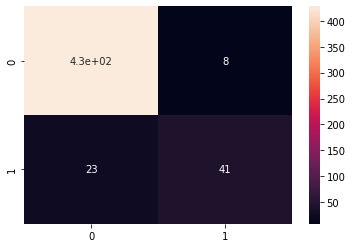

In [87]:
sns.heatmap(cf,annot=True);

In [88]:
print(classification_report(y_credito_teste,previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



## ARVORE

### Modelo e métricas

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
arvore_credito = DecisionTreeClassifier(criterion = 'entropy',random_state=0);
arvore_credito.fit(X_credito_treinamento,y_credito_treinamento);

In [91]:
previsoes = arvore_credito.predict(X_credito_teste)

In [92]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [93]:
accuracy_score(y_credito_teste,previsoes)

0.982

## Random forest

### Modelo e métricas

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
random_forest_credito = RandomForestClassifier(n_estimators=40, criterion='entropy',random_state=0)
random_forest_credito.fit(X_credito_treinamento,y_credito_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [96]:
previsoes = random_forest_credito.predict(X_credito_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [97]:
accuracy_score(y_credito_teste,previsoes)

0.984

## KNN

### Modelo e métricas

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn_credito = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_credito.fit(X_credito_treinamento,y_credito_treinamento)

KNeighborsClassifier()

In [101]:
previsoes = knn_credito.predict(X_credito_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [102]:
accuracy_score(y_credito_teste,previsoes)

0.986

## REDES NEURAIS

### Modelo e métricas

In [103]:
from sklearn.neural_network import MLPClassifier

In [104]:
rede_neural_credito = MLPClassifier(max_iter=1500, verbose = True, tol = 0.0000100, solver='adam',activation='relu',hidden_layer_sizes=(20,20))
rede_neural_credito.fit(X_credito_treinamento,y_credito_treinamento)

Iteration 1, loss = 0.52540362
Iteration 2, loss = 0.46676150
Iteration 3, loss = 0.41927977
Iteration 4, loss = 0.38302255
Iteration 5, loss = 0.35180748
Iteration 6, loss = 0.32657232
Iteration 7, loss = 0.30496972
Iteration 8, loss = 0.28558772
Iteration 9, loss = 0.26761902
Iteration 10, loss = 0.25122068
Iteration 11, loss = 0.23599544
Iteration 12, loss = 0.22228320
Iteration 13, loss = 0.20905144
Iteration 14, loss = 0.19699168
Iteration 15, loss = 0.18642179
Iteration 16, loss = 0.17674523
Iteration 17, loss = 0.16824592
Iteration 18, loss = 0.16070786
Iteration 19, loss = 0.15406619
Iteration 20, loss = 0.14802778
Iteration 21, loss = 0.14253419
Iteration 22, loss = 0.13768794
Iteration 23, loss = 0.13313703
Iteration 24, loss = 0.12911963
Iteration 25, loss = 0.12544077
Iteration 26, loss = 0.12175273
Iteration 27, loss = 0.11854916
Iteration 28, loss = 0.11557635
Iteration 29, loss = 0.11282473
Iteration 30, loss = 0.11021806
Iteration 31, loss = 0.10800070
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, tol=1e-05,
              verbose=True)

In [105]:
previsoes = rede_neural_credito.predict(X_credito_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [106]:
accuracy_score(y_credito_teste,previsoes)

0.998

## VALIDAÇÃO CRUZADA

In [107]:
from sklearn.model_selection import cross_val_score, KFold

In [108]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_bayes = []
resultados_rede_neural = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_credito, y_credito, cv = kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest, X_credito, y_credito, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_credito, y_credito, cv = kfold)
  resultados_knn.append(scores.mean())

  bayes = GaussianNB()
  scores = cross_val_score(bayes, X_credito, y_credito, cv = kfold)
  resultados_bayes.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, X_credito, y_credito, cv = kfold)
  resultados_rede_neural.append(scores.mean())

0


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

1


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

2


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

3


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

4


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

5


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

6


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

7


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

8


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

9


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

10


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

11


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

12


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

13


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

14


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

15


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

16


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

17


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

18


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

19


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

20


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

21


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

22


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

23


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

24


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

25


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

26


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

27


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

28


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

29


c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\KADU\Ap

In [109]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Bayes': resultados_bayes,
                            'Rede neural': resultados_rede_neural})
resultados

,Arvore,Random forest,KNN,Bayes,Rede neural
0,0.9825,0.9830,0.9770,0.9255,0.9965
1,0.9895,0.9880,0.9830,0.9255,0.9970
2,0.9875,0.9830,0.9815,0.9255,0.9965
3,0.9855,0.9825,0.9785,0.9255,0.9970
4,0.9900,0.9845,0.9820,0.9255,0.9965
5,0.9875,0.9825,0.9810,0.9260,0.9970
6,0.9890,0.9840,0.9780,0.9245,0.9965
7,0.9905,0.9845,0.9805,0.9250,0.9970
8,0.9880,0.9895,0.9795,0.9255,0.9970
9,0.9845,0.9820,0.9800,0.9250,0.9960


In [110]:
resultados.describe()

,Arvore,Random forest,KNN,Bayes,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987850,0.984250,0.980883,0.925467,0.996717
std,0.001881,0.002020,0.001794,0.000754,0.000387
min,0.982500,0.981500,0.977000,0.923500,0.996000
25%,0.987000,0.982625,0.980000,0.925000,0.996500
50%,0.988000,0.984000,0.981000,0.925500,0.997000
75%,0.989000,0.985000,0.982000,0.926000,0.997000
max,0.991000,0.989500,0.984000,0.927000,0.997500


In [111]:
resultados.var()

Arvore           3.537069e-06
Random forest    4.081897e-06
KNN              3.218678e-06
Bayes            5.678161e-07
Rede neural      1.497126e-07
dtype: float64

In [112]:
(resultados.std()/resultados.mean())*100#coeficiente de variação

Arvore           0.190384
Random forest    0.205270
KNN              0.182903
Bayes            0.081422
Rede neural      0.038820
dtype: float64

## TESTE DE HIPÓTESES   

### TESTE DE NORMALIDADE DOS RESULTADOS   

In [113]:
alpha=0.05 #H0 - OS DADOS ESTÃO EM DISTRIBUIÇÃO NORMAL, H1 - OS DADOS NÃO ESTÃO EM DISTRIBUIÇÃO NORMAL p > 0.05 aceitar H0, p <= 0.05 rejeitar H0.

In [114]:
from scipy.stats import shapiro

In [115]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_bayes), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.9510012269020081, pvalue=0.1798173189163208),
 ShapiroResult(statistic=0.9246296882629395, pvalue=0.03542357310652733),
 ShapiroResult(statistic=0.9676049947738647, pvalue=0.4758945405483246),
 ShapiroResult(statistic=0.9452217817306519, pvalue=0.12577250599861145),
 ShapiroResult(statistic=0.823164165019989, pvalue=0.00017861351079773158))

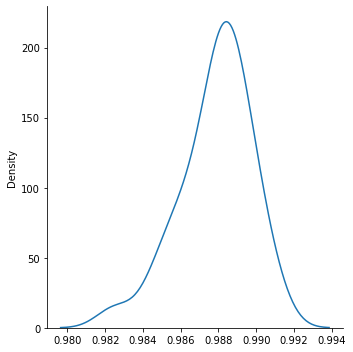

In [116]:
sns.displot(resultados_arvore, kind='kde');

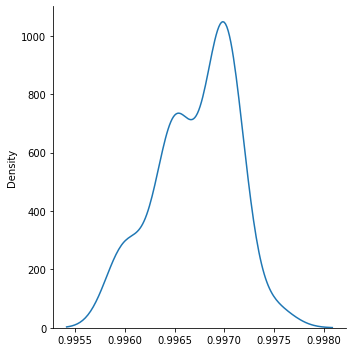

In [117]:
sns.displot(resultados_rede_neural, kind='kde');

### ANOVA

In [119]:
from scipy.stats import f_oneway

In [120]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_bayes, resultados_rede_neural)
p

3.2597992859409928e-177

In [121]:
alpha = 0.05

In [122]:
if (p <= alpha):
    print('Hipotese H0 rejeitada, os dados são diferentes.')
else:
    print('Hipotese H1 rejeitada, os dados são iguais.')

Hipotese H0 rejeitada, os dados são diferentes.


### TESTE DE TUKEY, QUAL O MELHOR ALGORITMO?

In [123]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_bayes, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                                       'arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                                       'arvore','arvore','arvore','arvore', 'random_forest','random_forest','random_forest','random_forest','random_forest',
                                       'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                                       'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                                       'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                                       'random_forest','random_forest','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                                       'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                                       'bayes','bayes','bayes','bayes','bayes','bayes','bayes','bayes','bayes','bayes','bayes','bayes','bayes','bayes','bayes',
                                       'bayes','bayes','bayes','bayes','bayes','bayes','bayes','bayes','bayes','bayes','bayes','bayes','bayes','bayes','bayes',
                                       'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural',
                                       'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural',
                                       'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural',
                                       'rede_neural','rede_neural','rede_neural','rede_neural']}

In [125]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9825,arvore
1,0.9895,arvore
2,0.9875,arvore
3,0.9855,arvore
4,0.9900,arvore
...,...,...
145,0.9970,rede_neural
146,0.9965,rede_neural
147,0.9970,rede_neural
148,0.9965,rede_neural


In [126]:
from statsmodels.stats.multicomp import MultiComparison

In [127]:
compara_algoritmo = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])#passa a coluna de dados e agrupa pela coluna algoritmo.

In [128]:
teste_estatistico = compara_algoritmo.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
       arvore         bayes  -0.0624   0.0 -0.0635 -0.0613   True
       arvore           knn   -0.007   0.0 -0.0081 -0.0059   True
       arvore random_forest  -0.0036   0.0 -0.0047 -0.0025   True
       arvore   rede_neural   0.0089   0.0  0.0078    0.01   True
        bayes           knn   0.0554   0.0  0.0543  0.0565   True
        bayes random_forest   0.0588   0.0  0.0577  0.0599   True
        bayes   rede_neural   0.0713   0.0  0.0702  0.0723   True
          knn random_forest   0.0034   0.0  0.0023  0.0045   True
          knn   rede_neural   0.0158   0.0  0.0147  0.0169   True
random_forest   rede_neural   0.0125   0.0  0.0114  0.0136   True
-----------------------------------------------------------------


In [129]:
resultados.mean()## foi rejeitado H0, de que estatisticamente todos os dados são iguais. Rede neural é superior.  

Arvore           0.987850
Random forest    0.984250
KNN              0.980883
Bayes            0.925467
Rede neural      0.996717
dtype: float64

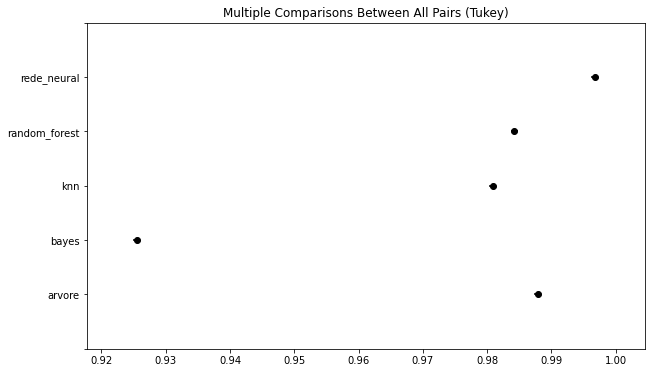

In [130]:
teste_estatistico.plot_simultaneous();